# Multiple Linear Regression



## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Importing the Dataset

In [5]:
dataset = pd.read_csv('50_Startups.csv')

In [6]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [29]:
cols = dataset.columns

## Visualizing the Data

/home/evazs/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


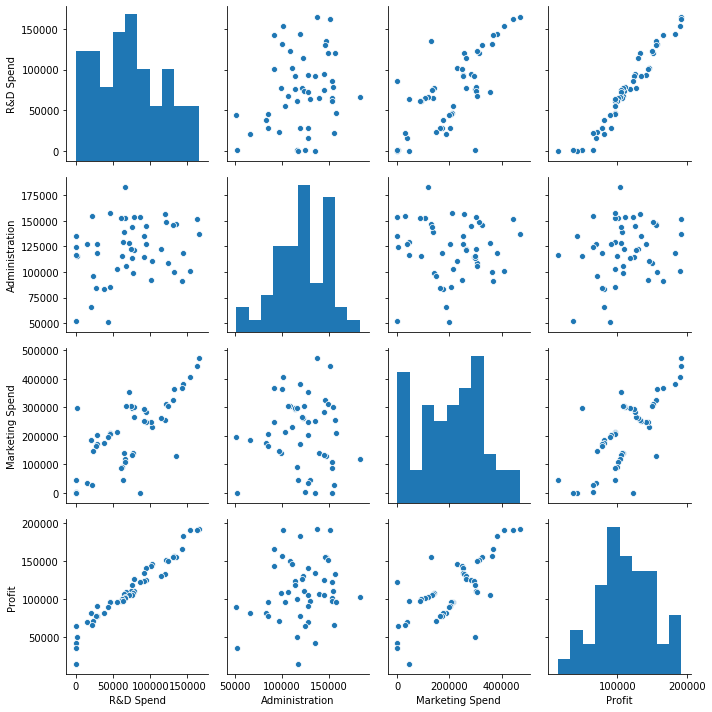

In [12]:
sb.pairplot(dataset[cols], size=2.5)
plt.tight_layout()
plt.show()

In [66]:
colm= dataset.iloc[:,[0,1,2,4]]

## Creating Correlation Matrix

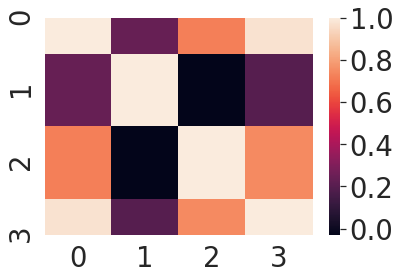

In [67]:
cm = np.corrcoef(colm.values.T)
sb.set(font_scale=2.5)
hm = sb.heatmap(cm)
plt.show()

In [68]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Handling Categorical Data

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Spitting Dataset into Train Test

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Creating and Training Regression Model

In [73]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Making the Predictions

In [92]:
y_pred = regressor.predict(X_test)
y_pred

array([103015.2 , 132582.28, 132447.74,  71976.1 , 178537.48, 116161.24,
        67851.69,  98791.73, 113969.44, 167921.07])

In [93]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])